In [1]:
try:
    import torch
    print("successfully imported torch")
    print(torch.__version__)
except ImportError:
    !! pip install torch torchvision torchaudio --user --index-url https://download.pytorch.org/whl/cpu
    print("completed installing torch")

successfully imported torch
2.6.0+cu124


In [2]:
try:
    import numpy as np
    print("successfully imported numpy")
    print(np.__version__)
except ImportError:
    !! pip install numpy --user --upgrade
    print("completed installing numpy")

successfully imported numpy
1.26.4


In [3]:
try:
    from matplotlib import pyplot as plt
    print("successfully imported matplotlib")
except ImportError:
    !! pip install matplotlib --user --upgrade
    print("completed installing matplotlib")

successfully imported matplotlib


In [4]:
!! pip install aenet-gpr --user --upgrade
print("completed installing aenet-gpr")

! pip show aenet-gpr

completed installing aenet-gpr
Name: aenet-gpr
Version: 1.2.3
Summary: Atomistic simulation tools based on Gaussian Processes Regression
Home-page: https://github.com/atomisticnet/aenet-gpr
Author: In Won Yeu
Author-email: iy2185@columbia.edu
License: MPL-2.0
Location: /data/home/iy2185/.local/lib/python3.12/site-packages
Requires: ase, dscribe
Required-by: 


In [5]:
import os, sys, site
sys.path.append(site.USER_SITE)

import aenet_gpr
print(aenet_gpr.__version__)

1.2.3


# 1. Prepare training/test data

We are using train/test HSE06 data of EC dimer prepared in `aenet-gpr/example/2_EC-EC/`

In [6]:
import os.path

! rm -rf 2_EC-EC
! mkdir 2_EC-EC
    
if os.path.isfile("../example/2_EC-EC/train_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/train_set_tutorial.zip -d ./2_EC-EC/
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
    ! unzip -oq train_set_tutorial.zip -d ./2_EC-EC/
    ! rm train_set_tutorial.zip
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l

--2025-05-17 19:26:50--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip [following]
--2025-05-17 19:26:50--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101063 (99K) [application/zip]
Saving to: ‘train_set_tutorial.zip’

train_set_tutorial. 100%[===================>]  98.69K  --.-KB/s    in 0.002s  

2025

In [7]:
if os.path.isfile("../example/2_EC-EC/test_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/test_set_tutorial.zip -d ./2_EC-EC/
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
    ! unzip -oq test_set_tutorial.zip -d ./2_EC-EC/
    ! rm test_set_tutorial.zip
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l

--2025-05-17 19:26:56--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip [following]
--2025-05-17 19:26:56--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148252 (145K) [application/zip]
Saving to: ‘test_set_tutorial.zip’

test_set_tutorial.z 100%[===================>] 144.78K  --.-KB/s    in 0.003s  

2025-05

# 2-1. Train–Test with default kernel parameters (scale 0.4, weight 1.0)

In addition to the reference data files, following configuration file `train.in` is all you need to run aenet-gpr. 

First, let us check the GPR evaluation error for test set with default kernel parameters.

In [8]:
! rm -f train.in

if os.path.isfile("../example/2_EC-EC/train.in"):
    ! cp ../example/2_EC-EC/train.in .
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in

--2025-05-17 19:27:01--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train.in [following]
--2025-05-17 19:27:01--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train.in
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566 [text/plain]
Saving to: ‘train.in’

train.in            100%[===================>]     566  --.-KB/s    in 0s      

2025-05-17 19:27:01 (10.3 MB/s) - ‘train.in’ saved [566/566]



In [9]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
# scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
# Additional_write True

# Data augmentation parameter
# Disp_length 0.05
# Num_copy 3


In [10]:
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 19:27:11.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.060622 s
Maximum CPU memory used:             0.538403 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (80,)  # (N_data, )
Force data size: (80, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

# 2-2. Visualize the results

In [11]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [15]:
diff_per_atom = (energy_test_reference - energy_test_gpr) / 20

print(diff_per_atom.min(), diff_per_atom.max())

0.0023909496989290347 0.016170085142766764


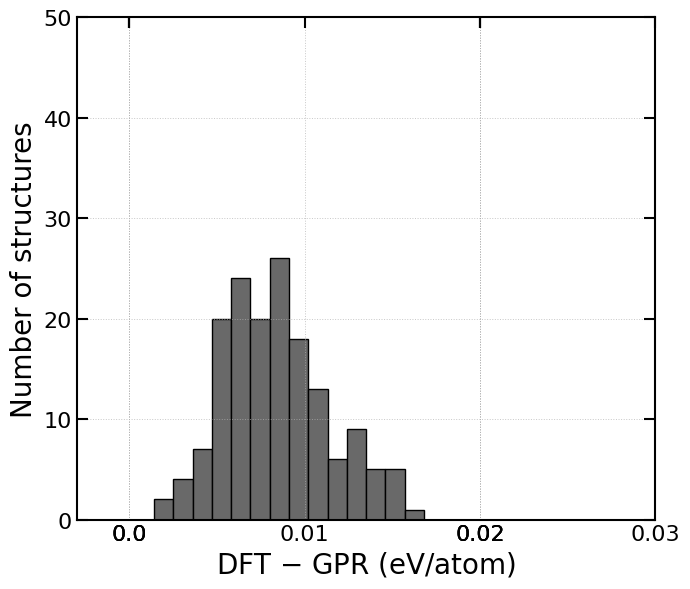

In [17]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff_per_atom, bins=30, range=(-0.003, 0.03))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV/atom)", fontdict=font_x)
ax2.set_xlim([-0.003, 0.03])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.003, 0.03])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 50])
y_labels = [int(label) for label in ax2.get_yticks()]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 50])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 3-1. Train–Test (scale 1.5, weight 1.0)

Since, the constructed GPR with default parameters underestimates energy, let us change the parameters.

In [18]:
! sed -i '15s|.*|scale 1.5|' train.in

In [19]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
# Additional_write True

# Data augmentation parameter
# Disp_length 0.05
# Num_copy 3


In [20]:
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 19:28:56.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.050923 s
Maximum CPU memory used:             0.538139 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (80,)  # (N_data, )
Force data size: (80, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

By changing the scale parameter from 0.4 to 1.5, 

 - total energy error is reduced from 0.17 eV to 0.04 eV
 - uncertainty estimate is reduced from 0.084 to 0.002

# 3-2. Visualize the test results

In [21]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [22]:
diff_per_atom = (energy_test_reference - energy_test_gpr) / 20

print(diff_per_atom.min(), diff_per_atom.max())

-0.002552433228447626 0.006854461424882175


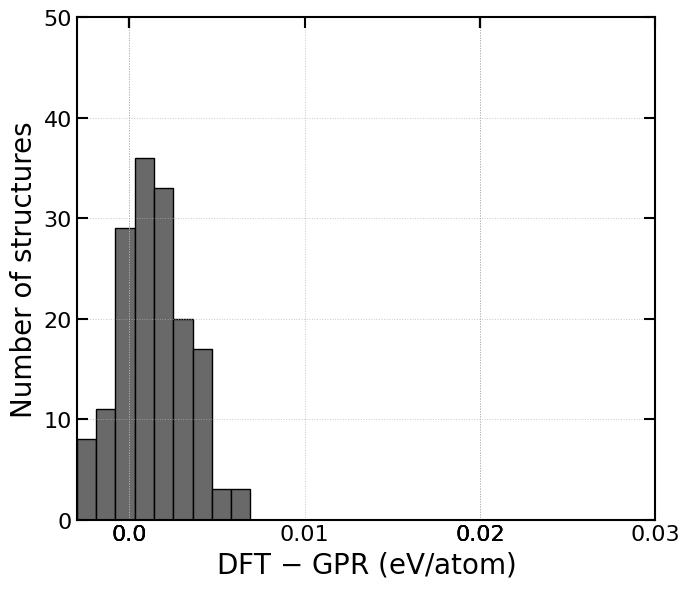

In [24]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff_per_atom, bins=30, range=(-0.003, 0.03))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV/atom)", fontdict=font_x)
ax2.set_xlim([-0.003, 0.03])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.003, 0.03])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 50])
y_labels = [int(label) for label in ax2.get_yticks()]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 50])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 4. Augment

So, using these parameters, augment step will be executed.

In [25]:
! sed -i '3s|.*|# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf|' train.in
! sed -i '25s|.*|Additional_write True|' train.in
! sed -i '28s|.*|Disp_length 0.05|' train.in
! sed -i '29s|.*|Num_copy 2|' train.in

In [26]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
Additional_write True

# Data augmentation parameter
Disp_length 0.05
Num_copy 2


In [27]:
! rm -rf additional_xsf/
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 19:30:25.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.053119 s
Maximum CPU memory used:             0.537945 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (80,)  # (N_data, )
Force data size: (80, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

Now, 160 new data have been augmented

In [28]:
! cd ./additional_xsf/ && ls

file_00000.xsf	file_00032.xsf	file_00064.xsf	file_00096.xsf	file_00128.xsf
file_00001.xsf	file_00033.xsf	file_00065.xsf	file_00097.xsf	file_00129.xsf
file_00002.xsf	file_00034.xsf	file_00066.xsf	file_00098.xsf	file_00130.xsf
file_00003.xsf	file_00035.xsf	file_00067.xsf	file_00099.xsf	file_00131.xsf
file_00004.xsf	file_00036.xsf	file_00068.xsf	file_00100.xsf	file_00132.xsf
file_00005.xsf	file_00037.xsf	file_00069.xsf	file_00101.xsf	file_00133.xsf
file_00006.xsf	file_00038.xsf	file_00070.xsf	file_00102.xsf	file_00134.xsf
file_00007.xsf	file_00039.xsf	file_00071.xsf	file_00103.xsf	file_00135.xsf
file_00008.xsf	file_00040.xsf	file_00072.xsf	file_00104.xsf	file_00136.xsf
file_00009.xsf	file_00041.xsf	file_00073.xsf	file_00105.xsf	file_00137.xsf
file_00010.xsf	file_00042.xsf	file_00074.xsf	file_00106.xsf	file_00138.xsf
file_00011.xsf	file_00043.xsf	file_00075.xsf	file_00107.xsf	file_00139.xsf
file_00012.xsf	file_00044.xsf	file_00076.xsf	file_00108.xsf	file_00140.xsf
file_00013.xsf	file_00045

Their structures are perturbed from reference training data and their energy tags are given from the GPR predictions

In [29]:
! cd ./additional_xsf/ && cat file_00015.xsf

# total energy = -18640.4801071737128950 eV

ATOMS
O     9.94573790435563     6.40041923065285     12.24879328615273     1.01768145028536     2.68578622387475     -1.08647510013816
O     8.58680000880612     5.23061864980926     13.45687049266574     -3.97502573074348     4.14157183034060     1.66341752037246
O     9.91713772790959     4.15866486567703     12.22490196324355     -0.38752808258116     3.89012848197936     0.44633572373915
C     9.31508566745945     7.38329547837776     13.00392957654479     -1.68606596533793     1.29300391863181     1.38709245941953
C     7.97611449947838     6.65456646970219     13.53330026558744     3.71395455257712     -1.20501858488729     1.63427659454620
C     9.53329326117151     5.32500784682828     12.56877026345161     2.23986390767276     -9.10190069901634     -1.30031140098853
H     9.05245160890000     8.27696606392889     12.40329666175133     0.73685166679505     -0.56656355509793     0.12603201293771
H     9.96752066261590     7.803474331

In [30]:
! cd ./additional_xsf/ && cat file_00016.xsf

# total energy = -18637.7619898261837079 eV

ATOMS
O     10.03732183225091     6.50001942834881     12.15470209195101     -4.38679963819773     -2.72101500647890     4.38098528856018
O     8.44882375270741     5.33618632138110     13.46535871083996     -0.65855574699462     -0.49725496656970     1.52023320731432
O     9.90209270678696     4.16148642966122     12.07692982765479     -2.14832044501880     2.70115244080070     3.74573584126111
C     9.25405487214038     7.46751797674970     13.13224473968100     -1.71393157591529     -1.66890700589072     -5.25075346414871
C     7.96367822829748     6.70036666594063     13.68234883030874     6.84813565105931     -1.03802164519063     -7.15169361165872
C     9.48617332568135     5.17543600300886     12.69426426746814     2.82532181149958     1.26932607633226     -6.76945444334637
H     9.03380714551799     8.26093233379832     12.38969966573350     0.38084179087494     0.51293247975449     0.60189231533274
H     9.92565687809495     7.73481